In [1]:
#imports
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pytesseract

In [2]:
def show_image(img,gray=0):    
    if gray == 1:
        plt.imshow(img, cmap='gray')        
    else:
        plt.imshow(img)    
    plt.show()

In [3]:
def color_gradient_combo_pipeline(img, s_thresh=(100, 255), sx_thresh=(20, 100)):    
    # Convert to HLS color space and separate the S and L channel
   # hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HLS).astype(np.float)
    l_channel = img
    s_channel = img
    
    # Apply sobel on L channel
    sobelx = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobelx = np.absolute(sobelx) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobelx = np.uint8(255*abs_sobelx/np.max(abs_sobelx))
    
    sobely = cv2.Sobel(l_channel, cv2.CV_64F, 1, 0) # Take the derivative in x
    abs_sobely = np.absolute(sobely) # Absolute x derivative to accentuate lines away from horizontal
    scaled_sobely = np.uint8(255*abs_sobely/np.max(abs_sobely))
    
    
    # Threshold x gradient
    sxbinary = np.zeros_like(scaled_sobelx)
    sxbinary[(scaled_sobelx >= sx_thresh[0]) & (scaled_sobelx <= sx_thresh[1])] = 1
    
    # Threshold y gradient
    sybinary = np.zeros_like(scaled_sobely)
    sybinary[(scaled_sobely >= sx_thresh[0]) & (scaled_sobely <= sx_thresh[1])] = 1
    
    # Apply a threshold on S color channel
    s_binary = np.zeros_like(s_channel)
    s_binary[(s_channel >= s_thresh[0]) & (s_channel <= s_thresh[1])] = 1    
    return s_binary,sxbinary, sybinary
    #combine Gradient threshold and Color threshold
    combined_binary = np.zeros_like(sxbinary)
    combined_binary[(s_binary == 1) | (sxbinary == 1)] = 1
    color_binary = 255 * np.dstack((combined_binary, combined_binary, combined_binary)).astype('uint8')
    return color_binary, combined_binary


In [ ]:
file = "1.jpg"
try:
    import Image
except ImportError:
    from PIL import Image
import pytesseract
print(pytesseract.image_to_string(Image.open(file)))

In [ ]:
file = "1.jpg"
img = cv2.imread('./Images/'+file) #opencv opens images in BGR format
img = cv2.resize(img,(256,368))
img2 = img.copy()
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #convert to standard RGB    
print(img.shape)
show_image(img,1)
#plt.imshow(img, cmap='gray')




In [ ]:
img1 = img.copy();
show_image(img1,1)
print()
#ret,thresh = cv2.threshold(img1,100,0,0)
bImg = np.ones_like(img)

bImg[img > 90] = 0
show_image(bImg,1)
print()

print(bImg.shape)

im2, contours, hierarchy = cv2.findContours(bImg,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    print(cv2.contourArea(cnt))
    if cv2.contourArea(cnt)>50:
        [x,y,w,h] = cv2.boundingRect(cnt)

        if  h>28:
            cv2.rectangle(img2,(x,y),(x+w,y+h),(0,0,255),2)
            print("drawing rec")
            
show_image(img2)
'''cv2.drawContours(img2, contours, -1, (0,255,0), 3)
show_image(img2,1)'''

In [ ]:
plt.show()
print(len(contours))

In [ ]:
bImg = np.zeros_like(img)

bImg[img > 90] = 1
show_image(bImg,1)

In [ ]:
file = "2.jpg"
img = cv2.imread('./Images/'+file) #opencv opens images in BGR format
img = cv2.resize(img,(256,368))
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) #convert to standard RGB    
print(img.shape)
show_image(img,1)
#plt.imshow(img, cmap='gray')

In [ ]:
bImg = np.zeros_like(img)

bImg[img > 100] = 1
show_image(bImg,1)

In [ ]:
im = cv2.imread("./Images/1.jpg")
print(im.shape)
show_image(im)

im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
#im_gray = cv2.GaussianBlur(im_gray, (5, 5), 0)

ret, im_th = cv2.threshold(im_gray, 90, 255, cv2.THRESH_BINARY_INV)
print(im_th.shape,im_gray.shape)
_,ctrs, hier = cv2.findContours(im_th.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

show_image(im_th,1)

rects = [cv2.boundingRect(ctr) for ctr in ctrs]

for rect in rects:
    cv2.rectangle(im, (rect[0], rect[1]), (rect[0] + rect[2], rect[1] + rect[3]), (0, 255, 0), 3) 
show_image(im)

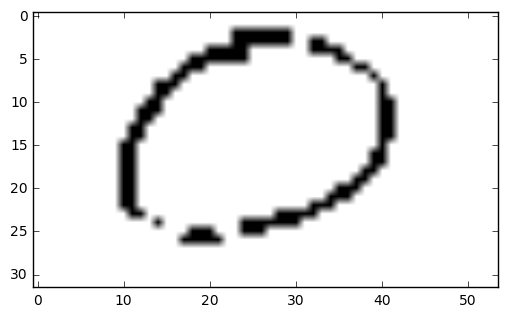

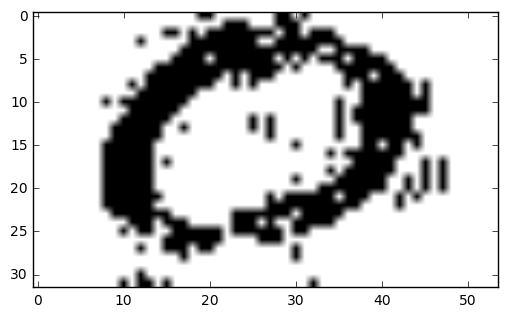

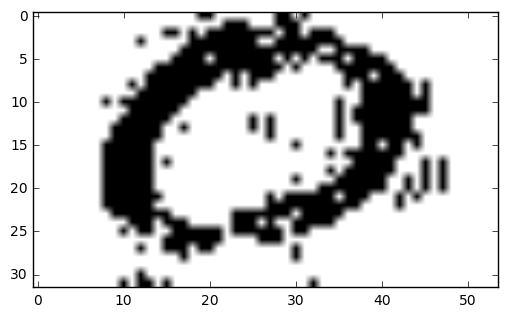

1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 1 1 1 1 1 1 
1 1 1 1 1 1 1 1 1 1

In [4]:
im = cv2.imread("./Images/3.jpg")
#show_image(im)
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
imgBinary,sxBinary,syBinary = color_gradient_combo_pipeline(im_gray,(120,255),(0,20))

show_image(imgBinary,1)
#print()
show_image(sxBinary,1)
#print()
show_image(syBinary,1)
for row in sxBinary:
    for col in row:
        print(col,end=' ')
    print()

In [ ]:
im = cv2.imread("./Images/1.jpg")
#show_image(im)
im_gray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
kernel_size = 3
#blur_gray = cv2.GaussianBlur(im_gray,(kernel_size, kernel_size), 0)
edges = cv2.Canny(blur_gray, 50, 160)
show_image(edges,1)